In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from sklearn.metrics import r2_score
from helper import process_log_data

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# Process Data

In [7]:
# Request - where bid was not successful
non_impressed_requests_df = process_log_data('Request', parent_directory + '/data/non_impressed_requests_1000126_20230525001452.csv')

# Response
ad_returned_df = process_log_data('Response', parent_directory + '/data/adreturned_1000126_20230525001500.csv')

# Notification
notify_df = process_log_data('Notification', parent_directory + '/data/notify_1000126_20230525001500.csv')

# Display DataFrames and Data Types

In [8]:
pd.set_option('display.max_columns', None)
for df in [non_impressed_requests_df, ad_returned_df, notify_df]:
  display(df.head(3))
  display(df.tail(3))
  print(df.dtypes)

,timestamp,RequestId,apiVersion,LogVersion,PublisherName,SiteId,City,State,Zip,Latitude,Longitude,IpAddress,Country,locationType,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,dnt,UserAgent,adType,Device,w,h,age,gender,income,education,carrier,os,OSVersion,keywords,Status,UID,UIDType,RTB Version,DisplayType,PartnerRequestID,Language,InventoryCtr,InventoryId,StoreUrl,BundleId,isApp,tagRequest,geohash,bidfloor,connectiontype,sspvendor,datacenter,deviceType,dealId
0,2023-05-25 00:14:33,a73e47a9-c73d-4da0-b248-5b68867d5352,1.0,2.4,google,MyRadar Weather Radar,Plantation,FL,33317,26.120001,-80.220001,2600:1700:14e0::,us,3,plantation,fl,33317,26.120001,-80.220001,False,Mozilla%2F5.0+%28Linux%3B+Android+13%3B+SM-G99...,banner,sm-g991u,300,250,NaN,NaN,NaN,NaN,0,android,13,[],211,f4426463-6b41-2320-a220-afacb70b7796,AID,2.1,banner,TCyuwSlR5JpJk/6cIq2zqw,en,0.0,11130,https://play.google.com/store/apps/details?id=...,com.acmeaom.android.myradar,1,0,dhwuwe18,0.01,0,NaN,2,4,NaN
1,2023-05-25 00:14:33,b3fddc01-162e-4668-b991-79fa4dac375d,1.0,2.4,google,Your Fictional Novels Hub,Denver,CO,NaN,39.740002,-104.989998,174.212.229.0,us,3,denver,co,NaN,39.740002,-104.989998,False,Mozilla%2F5.0+%28Linux%3B+Android+11%3B+SM-S10...,banner,sm-s102dl,320,50,NaN,NaN,NaN,NaN,70119,android,11,[],211,b5410418-5f3b-0299-d823-87cfc40a4595,AID,2.1,banner,QZEJ4RQrWBE5nfIq9cwf4A,en,0.0,1,https://play.google.com/store/apps/details?id=...,com.happy.topnovels,1,0,9xj64fkw,1.39,0,NaN,2,4,NaN
2,2023-05-25 00:14:33,f7ca63ba-81eb-4df2-9c47-0faa01e7342b,1.0,2.4,openx,wellplated.com,chicago,IL,NaN,41.84885,-87.67125,104.28.97.17,us,3,NaN,NaN,NaN,37.751,-97.822,False,Mozilla%2F5.0+%28iPhone%3B+CPU+iPhone+OS+15_6+...,banner,iPhone,300,250,NaN,NaN,NaN,NaN,NaN,iOS,Other,[],207,NaN,NONE,2.5,banner,3e87a13b-ec0f-493e-a559-dd42562e2c1c,en,0.0,558245995,NaN,wellplated.com,0,0,9ydqy025,0.748,0,NaN,2,4,NaN


,timestamp,RequestId,apiVersion,LogVersion,PublisherName,SiteId,City,State,Zip,Latitude,Longitude,IpAddress,Country,locationType,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,dnt,UserAgent,adType,Device,w,h,age,gender,income,education,carrier,os,OSVersion,keywords,Status,UID,UIDType,RTB Version,DisplayType,PartnerRequestID,Language,InventoryCtr,InventoryId,StoreUrl,BundleId,isApp,tagRequest,geohash,bidfloor,connectiontype,sspvendor,datacenter,deviceType,dealId
299997,2023-05-25 00:14:52,ff185a44-c62b-4c61-8884-370bc247c65c,1.0,2.4,google,Block Blast Adventure Master,Campeche,Campeche,NaN,19.83,-90.529999,177.236.114.0,mx,3,campeche,campeche,97000,19.83,-90.529999,False,Mozilla%2F5.0+%28Linux%3B+Android+12%3B+220111...,banner,21121119tl,300,50,NaN,NaN,NaN,NaN,0,android,12,[],211,ac4591c2-5c08-f054-aa4d-5bdf6be2c1bf,AID,2.1,banner,wer48w7b3j6awUZ5wNzOfg,es,0.0,7664,https://play.google.com/store/apps/details?id=...,com.block.juggle,1,0,9gx8gcyn,0.4,0,NaN,2,4,NaN
299998,2023-05-25 00:14:52,6c9d2b68-897c-4860-b5c5-24531a36f022,1.0,2.4,appnexus,Match 3D,Wilton,CT,NaN,41.0965,-73.4277,69.116.131.210,us,3,wilton,ct,06897,41.0965,-73.4277,False,Mozilla%2F5.0+%28iPhone%3B+CPU+iPhone+OS+16_4_...,banner,iPhone,320,50,NaN,O,NaN,NaN,NaN,Apple iOS,NaN,[],211,dd4ce52f-f2c8-4926-9e5e-c34755e748bc,AID,2.4,banner,612528420175608310,en,0.0,5630748,apps.apple.com/us/app/match-3d/id1502447854?uo=4,1502447854,1,0,dr7cc17s,0.438275,0,NaN,2,4,NaN
299999,2023-05-25 00:14:52,9d56b230-2acf-496f-8a7e-608a90e13da8,1.0,2.4,openx,twentytwowords.com,belleville,MI,NaN,42.19668,-83.48851,68.37.253.53,us,3,belleville,mi,48111,42.19668,-83.48851,False,Mozilla%2F5.0+%28iPhone%3B+CPU+iPhone+OS+16_1_...,banner,NaN,300,250,NaN,NaN,NaN,NaN,NaN,iOS,16.1.2,[],211,a277852b-46c6-0f5d-2eb6-6843970bbc06,GENERIC_ID,2.5,banner,e00e05e7-8121-4be6-8b4b-b40d116f2c0b,en,0.0,539071207,NaN,twentytwowords.com,0,0,dps8h1tt,1.991,2,NaN,2,4,NaN


timestamp           datetime64[ns]
RequestId                   object
apiVersion                  object
LogVersion                  object
PublisherName               object
SiteId                      object
City                        object
State                       object
Zip                         object
Latitude                    object
Longitude                   object
IpAddress                   object
Country                     object
locationType                object
CityUsed                    object
StateUsed                   object
ZipUsed                     object
LatUsed                     object
LongUsed                    object
dnt                         object
UserAgent                   object
adType                      object
Device                      object
w                           object
h                           object
age                         object
gender                      object
income                      object
education           

,timestamp,RequestId,RecordID,apiVersion,LogVersion,PublisherName,SiteId,AdName,AdCaption,AdAddress,AdCity,AdState,AdZip,AdCountry,AdLatitude,AdLongitude,AdPhoneNo,AdDisplayPhoneNo,AdCategory,AdRating,AdVendor,BillingParamter,CreativeId,AdvBidRates,PubBidRates,BidFloor,BidAmount,UID,UIDType,LatUsed,LongUsed,Distance,tagRequest,bidfloor3,bid3,win3,bundleId
0,2023-05-25 00:13:55,9e41ebc0-01a3-4071-94ee-18ac5f37c902,2-80000357800-393244-26218616,1.0,2.4,rubicon,Water Sort Puzzle - Sort Color,"JUST LISTED in 33 W Delaware Place #7G, Chicag...",NaN,33 w delaware place #7g,chicago,il,60610,us,41.89897,-87.629654,NaN,NaN,Real Estate,NaN,2,80000357800@5395@0@393244@26218616,1980144,1:0.0019,1:0.0019,1.248255,1.258255,97404e2d-b313-43ab-9e61-bc9fe06aa1e9,IDFA,41.77,-87.67,9.159628,0,0.0,2.3,0.0,1597897013
1,2023-05-25 00:13:55,8edcfae9-ae17-4043-b73b-5a66beb19345,2-80000358415-393897-26227260,1.0,2.4,google,OnDemandKorea: Watch Korean TV,"JUST LISTED in 415 Lyerly Pointe, Alpharetta, ...",NaN,415 lyerly pointe,alpharetta,ga,30022,us,34.045208,-84.258446,NaN,NaN,Real Estate,NaN,2,80000358415@5809@0@393897@26227260,1983972,1:0.0019,1:0.0019,0.07,0.29,DA431409-A176-F340-6BCD-AA3103E950B6,AID,33.939999,-84.32,8.088002,0,0.0,2.3,0.0,917796578
2,2023-05-25 00:13:56,a083249b-29b1-4386-b0b9-576d83f251ea,2-80000353745-389073-26090267,1.0,2.4,google,CoinGecko - Live Crypto Prices,"JUST LISTED in 574 Legacy NE Court, Rockford, ...",NaN,574 legacy ne court,rockford,mi,49341,us,43.129494,-85.57461,NaN,NaN,Real Estate,NaN,2,80000353745@38033@0@389073@26090267,1950893,1:0.0019,1:0.0019,0.01,0.35,da45f8d5-d815-cc6f-d521-c6512e2157bb,AID,42.959999,-85.669998,12.676371,0,0.0,2.3,0.0,com.coingecko.coingeckoapp


,timestamp,RequestId,RecordID,apiVersion,LogVersion,PublisherName,SiteId,AdName,AdCaption,AdAddress,AdCity,AdState,AdZip,AdCountry,AdLatitude,AdLongitude,AdPhoneNo,AdDisplayPhoneNo,AdCategory,AdRating,AdVendor,BillingParamter,CreativeId,AdvBidRates,PubBidRates,BidFloor,BidAmount,UID,UIDType,LatUsed,LongUsed,Distance,tagRequest,bidfloor3,bid3,win3,bundleId
13471,2023-05-25 00:14:59,b8290a9e-3c70-45e1-8699-1ad341f1e314,2-80000358335-393814-26226770,1.0,2.4,rubicon,Killer Sudoku - Puzzle Games,"For Sale in 32502, Pensacola, FL, us",NaN,1 port royal way #1 & 3,pensacola,fl,32502,us,30.403908,-87.2149,NaN,NaN,Real Estate,NaN,2,80000358335@67188@0@393814@26226770,1983392,1:0.0036,1:0.0036,1.372093,1.392093,473b3f52-050b-4b79-8cd4-14515a37a89d,IDFA,30.37,-87.33,7.256965,0,0.0,4.28,0.0,1549645019
13472,2023-05-25 00:14:59,c7d44e36-798e-48b7-a11f-f980f8680ecc,2-80000354509-389898-26109098,1.0,2.4,rubicon,Blis Media XAPI,"JUST LISTED in 656 S 5TH AVE, Royersford, PA 1...",NaN,656 s 5th ave,royersford,pa,19468,us,40.18145,-75.52974,NaN,NaN,Real Estate,NaN,2,80000354509@46837@0@389898@26109098,1956235,1:0.0019,1:0.0019,0.2,0.23,A67F49DF-C262-41E4-A6CE-1939C5842AA7,IDFA,40.2874,-75.2156,18.134192,0,0.0,2.3,0.0,500963785
13473,2023-05-25 00:14:59,87796626-1830-43de-bafd-d1c3202919c2,2-80000345571-380606-25839186,1.0,2.4,rubicon,Alarm Clock for Me free,3001????_???513_???????_20230522,NaN,???????,????1??28-1,????,2110041,jp,35.579247,139.63907,NaN,NaN,Education,NaN,2,80000345571@28502@0@380606@25839186,1887860,1:0.005,1:0.005,1.471121,1.701121,99473565-efbc-43b4-acb1-6eeff6c9916c,AID,35.57444,139.62755,0.728355,0,0.0,5.94,0.0,com.apalon.myclockfree


timestamp           datetime64[ns]
RequestId                   object
RecordID                    object
apiVersion                  object
LogVersion                  object
PublisherName               object
SiteId                      object
AdName                      object
AdCaption                   object
AdAddress                   object
AdCity                      object
AdState                     object
AdZip                       object
AdCountry                   object
AdLatitude                  object
AdLongitude                 object
AdPhoneNo                   object
AdDisplayPhoneNo            object
AdCategory                  object
AdRating                    object
AdVendor                    object
BillingParamter             object
CreativeId                  object
AdvBidRates                 object
PubBidRates                 object
BidFloor                    object
BidAmount                   object
UID                         object
UIDType             

,timestamp,RequestId,RecordID,LogVersion,PublisherName,SiteId,BillingParameter,AdvBidRate,PubBidRate,NotificationType,AdVendor,Status,RedirectURL,UserKey,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,locationType,OS,DeviceMake,DeviceModel,DeviceType,UserAge,Gender,Carrier,distance,Language,BidFloor,BidAmount,PartnerCampaignId,ClickId,CreativeId,CreativeSize,cost,app_inventory_id,country,cur,win3,connectiontype,ipaddress,bundleid,traffictype,reqipaddress,datacenter,displaytype,timezone
0,2023-05-25 00:13:59,jfY3raujFNhm8ujyYgDkSw,2-80000355510-390820-26161379,2.3,google,2048,80000355510@46605@0@390820@26161379,0.0019,0.0019,1,2,0,NaN,00495794-a392-7bb9-c205-a0eec9487da0,birdsboro,pa,19508,40.259998,-75.839996,3,iOS,NaN,NaN,4,U,NaN,0,10.526013,en,0.98,1.26,NaN,NaN,1964567,320x50,0.001259,NaN,us,usd,0.0,0,70.44.201.121,840919914,app,70.44.201.0,2,banner,"US/Pacific"""
1,2023-05-25 00:13:59,9029856353286531945,2-80000353840-389174-26107494,2.3,appnexus,NovelToon+-+Daily+Novels,80000353840@29882@0@389174@26107494,NaN,NaN,4,2,0,NaN,29e6b338-2678-47c1-8af4-d03009dd4066,cape coral,fl,NaN,26.5557,-82.0206,3,Apple iOS,NaN,NaN,4,U,O,NaN,4.716377,en,0.176081,0.346081,NaN,NaN,1951648,300x250,0.0,NaN,us,USD,0.0,0,68.67.161.170,1472148728,app,76.148.59.192,2,banner,"US/Pacific"""
2,2023-05-25 00:13:59,7754610940039895507,2-80000349988-391748-26162717,2.3,appnexus,mgoblog.com,80000349988@37590@0@391748@26162717,NaN,NaN,4,2,0,NaN,NaN,henrico,va,23238,37.5277,-77.4331,3,Apple Mac,NaN,NaN,2,U,O,NaN,9.811218,en,1.880263,2.010263,NaN,NaN,1970577,300x600,0.0,NaN,us,USD,0.0,0,68.67.161.203,mgoblog.com,web,173.53.125.108,2,banner,"US/Pacific"""


,timestamp,RequestId,RecordID,LogVersion,PublisherName,SiteId,BillingParameter,AdvBidRate,PubBidRate,NotificationType,AdVendor,Status,RedirectURL,UserKey,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,locationType,OS,DeviceMake,DeviceModel,DeviceType,UserAge,Gender,Carrier,distance,Language,BidFloor,BidAmount,PartnerCampaignId,ClickId,CreativeId,CreativeSize,cost,app_inventory_id,country,cur,win3,connectiontype,ipaddress,bundleid,traffictype,reqipaddress,datacenter,displaytype,timezone
9625,2023-05-25 00:14:59,1a2c4575-06ae-4fcf-8aa7-6ef9d2bf922b,2-80000342637-392898-26165252,2.3,openx,Musi+-+Simple+Music+Streaming,80000342637@66484@0@392898@26165252,NaN,NaN,65,2,0,NaN,00000000-0000-0000-0000-000000000000,philadelphia,pa,19143,40.081039,-75.480995,3,iOS,NaN,NaN,4,U,NaN,Verizon+WiFi,0.032699,en,1.945,2.235,NaN,NaN,1977886,320x50,0.0,NaN,us,USD,0.0,2,74.109.25.147,591560124,app,74.109.25.147,2,banner,"US/Pacific"""
9626,2023-05-25 00:14:59,371f4c719a221174f1c3c4be6fb0f4e47eb5590e_43,2-80000341148-375687-25788186,2.3,rubicon,Happy+Color%C2%AE%3A+Coloring+Book,80000341148@34115@0@375687@25788186,NaN,NaN,65,2,0,NaN,6e37db28-73c9-4a76-bfe4-0cac216b62de,himeji,nagano,670-0941,34.8622,134.7033,3,Android,NaN,NaN,1,U,NaN,Other,5.052023,ja,0.94,1.1,NaN,NaN,1857431,320x50,0.0,NaN,jp,usd,0.0,2,61.197.117.38,com.pixel.art.coloring.color.number,app,61.197.117.38,2,banner,"Asia/Tokyo"""
9627,2023-05-25 00:14:59,ufa/UQc2Su0aJ4zOpznqEA,2-80000357093-392491-26164364,2.3,google,WBOY+12News,80000357093@46837@0@392491@26164364,0.0019,0.0019,1,2,0,NaN,894e1be0-4b12-dc76-4f55-320fe2ca59b5,philadelphia,pa,NaN,39.950001,-75.169998,3,android,NaN,NaN,4,U,NaN,0,3.806184,en,0.01,0.45,NaN,NaN,1975597,320x50,0.000449,NaN,us,usd,0.0,0,166.198.25.31,com.doapps.android.mln.MLN_d47268e9db2e9aa3827...,app,166.198.25.0,2,banner,"US/Pacific"""


timestamp            datetime64[ns]
RequestId                    object
RecordID                     object
LogVersion                   object
PublisherName                object
SiteId                       object
BillingParameter             object
AdvBidRate                   object
PubBidRate                   object
NotificationType             object
AdVendor                     object
Status                       object
RedirectURL                  object
UserKey                      object
CityUsed                     object
StateUsed                    object
ZipUsed                      object
LatUsed                      object
LongUsed                     object
locationType                 object
OS                           object
DeviceMake                   object
DeviceModel                  object
DeviceType                   object
UserAge                      object
Gender                       object
Carrier                      object
distance                    

# Joint Comparison

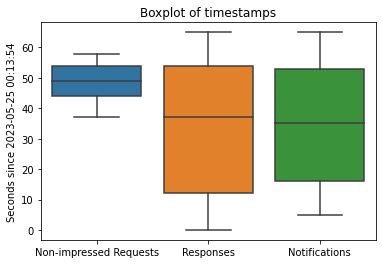

In [9]:
min_second = min(non_impressed_requests_df['timestamp'].min(),ad_returned_df['timestamp'].min(),notify_df['timestamp'].min())

data = pd.DataFrame({
    'Non-impressed Requests': (non_impressed_requests_df['timestamp'] - min_second).dt.total_seconds(),
    'Responses': (ad_returned_df['timestamp'] - min_second).dt.total_seconds(),
    'Notifications': (notify_df['timestamp'] - min_second).dt.total_seconds()
})

# Create a boxplot of the three groups
sns.boxplot(data=data)

# Add labels and title
plt.ylabel('Seconds since ' + str(min_second))
plt.title('Boxplot of timestamps')

# Display the plot
plt.show()

group by commonalities?

In [17]:
import pandas as pd
import itertools
from scipy.stats import chi2_contingency

dataframes = [non_impressed_requests_df, ad_returned_df, notify_df]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.size == 0:
        return 0
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Generate all possible combinations of two dataframes
combinations = list(itertools.combinations(dataframes, 2))

correlations = []

for df1, df2 in combinations:
    df1_cols = df1.columns
    df2_cols = df2.columns
    
    for col1 in df1_cols:
        if col1 in df2_cols:
            col2 = col1
            correlation = cramers_v(df1[col1], df2[col2])
            correlations.append((correlation, col1, col2))
        else:
            for col2 in df2_cols:
                correlation = cramers_v(df1[col1], df2[col2])
                correlations.append((correlation, col1, col2))

# Sort correlations in descending order
correlations.sort(reverse=True)

# Print the top 20 correlations
top_7_correlations = correlations[:20]
for correlation, col1, col2 in top_7_correlations:
    print(f"Correlation: {correlation:.4f}")
    print(f"Columns: {col1}, {col2}")
    print()


/var/folders/6z/l4j3mqhj3dn5zs8p568yg9hr0000gn/T/ipykernel_95874/1899562652.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/6z/l4j3mqhj3dn5zs8p568yg9hr0000gn/T/ipykernel_95874/1899562652.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/6z/l4j3mqhj3dn5zs8p568yg9hr0000gn/T/ipykernel_95874/1899562652.py:13: RuntimeWarning: invalid value encountered in long_scalars
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
/var/folders/6z/l4j3mqhj3dn5zs8p568yg9hr0000gn/T/ipykernel_95874/1899562652.py:14: RuntimeWarning: invalid value encountered in long_scalars
  rcorr = r - ((r - 1) ** 2) / (n - 1)
/var/folders/6z/l4j3mqhj3dn5zs8p568yg9hr0000gn/T/ipykernel_95874/1899562652.py:15: RuntimeWarning: invalid value encountered in long_scalars
  kcorr = k - ((k - 1) ** 2) / (n - 1)


Correlation: nan
Columns: RequestId, RequestId

Correlation: nan
Columns: apiVersion, apiVersion

Correlation: nan
Columns: LogVersion, LogVersion

Correlation: nan
Columns: City, apiVersion

Correlation: nan
Columns: City, LogVersion

Correlation: 0.3849
Columns: City, AdPhoneNo

Correlation: 0.3849
Columns: City, AdDisplayPhoneNo



In [18]:
correlations

[(nan, 'RequestId', 'RequestId'),
 (nan, 'apiVersion', 'apiVersion'),
 (nan, 'LogVersion', 'LogVersion'),
 (nan, 'City', 'apiVersion'),
 (nan, 'City', 'LogVersion'),
 (0.3849001794597506, 'City', 'AdPhoneNo'),
 (0.3849001794597506, 'City', 'AdDisplayPhoneNo'),
 (0.3710933141157801, 'timestamp', 'timestamp'),
 (0.12304728069914099, 'ZipUsed', 'AdZip'),
 (0.11504112520608958, 'City', 'AdCountry'),
 (0.11391639601961066, 'City', 'AdZip'),
 (0.10658333018010878, 'City', 'AdAddress'),
 (0.0952483785016722, 'City', 'AdCity'),
 (0.09177073379574138, 'City', 'RecordID'),
 (0.08708884180713278, 'City', 'AdLongitude'),
 (0.08708884180712904, 'City', 'AdLatitude'),
 (0.05842828003567879, 'City', 'RequestId'),
 (0.05069312776941153, 'StateUsed', 'AdZip'),
 (0.04734788057456662, 'City', 'AdName'),
 (0.039869215051833856, 'SiteId', 'SiteId'),
 (0.036097489685258465, 'City', 'timestamp'),
 (0.030741430516406168, 'City', 'SiteId'),
 (0.0, 'PublisherName', 'PublisherName'),
 (0.0, 'City', 'PublisherNam